> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

📸 Copyright: Jiang Wu
📝 Explicação: Scanning the skies for galaxies, Canadian astronomer Paul Hickson and colleagues identified some 100 compact groups of galaxies, now appropriately called Hickson Compact Groups. The four prominent galaxies seen in this intriguing telescopic skyscape are one such group, Hickson 44. The galaxy group is about 100 million light-years distant, far beyond the spiky foreground Milky Way stars, toward the constellation Leo. The two spiral galaxies in the center of the image are edge-on NGC 3190 with its distinctive, warped dust lanes, and S-shaped NGC 3187. Along with the bright elliptical, NGC 3193 (above and left) they are also known as Arp 316. The spiral toward the lower right corner is NGC 3185, the 4th member of the Hickson group. Like other galaxies in Hickson groups, these show signs of distortion and enhanced star formation, evidence of a gravitational tug of war that will eventually result in galaxy mergers on a cosmic timescale. The merger process

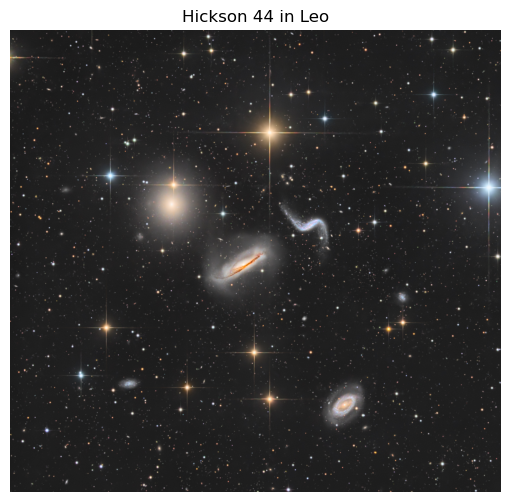

🔄 Limite total: 2000
🔄 Requisições restantes: 1998


In [ ]:
import requests
import json
import matplotlib.pyplot as plt
from skimage import io

with open("key.json") as f:
    api_key = f.read().strip().split("=")[1]

url = "https://api.nasa.gov/planetary/apod"
params = {"api_key": api_key}

response = requests.get(url, params=params)
data = response.json()

print(f"📸 Copyright: {data.get('copyright', 'N/A')}")
print(f"📝 Explicação: {data['explanation']}")

img_url = data.get("hdurl", data["url"])  
img = io.imread(img_url)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title(data["title"])
plt.show()

print(f"🔄 Limite total: {response.headers.get('X-RateLimit-Limit', 'N/A')}")
print(f"🔄 Requisições restantes: {response.headers.get('X-RateLimit-Remaining', 'N/A')}")


#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [ ]:
import requests

with open("key.json") as f:
    api_key = f.read().strip().split("=")[1]

url = "https://api.nasa.gov/planetary/apod"
params = {"api_key": api_key}

rate_limit = response.headers.get("X-RateLimit-Limit", "N/A")
rate_remaining = response.headers.get("X-RateLimit-Remaining", "N/A")

print(f"🔄 Limite total de requisições: {rate_limit}")
print(f"⚡ Requisições restantes: {rate_remaining}")

🔄 Limite total de requisições: 2000
⚡ Requisições restantes: 1995


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [ ]:
rover_name = "curiosity"
url = f"https://api.nasa.gov/mars-photos/api/v1/manifests/{rover_name}"
params = {"api_key": api_key}

response = requests.get(url, params=params)
data = response.json()["photo_manifest"]

max_sol = data["max_sol"]
max_date = data["max_date"]

print(f"🚀 Último dia marciano com fotos: {max_sol}")
print(f"📅 Última data terrestre com fotos: {max_date}")


🚀 Último dia marciano com fotos: 4499
📅 Última data terrestre com fotos: 2025-04-02


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



In [ ]:
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/{rover_name}/photos"
params = {"api_key": api_key, "sol": max_sol, "page": 1}

response = requests.get(url, params=params)
photos = response.json()["photos"]

cameras = ["NAVCAM", "FHAZ", "RHAZ"] 

plt.figure(figsize=(12, 8))

count = 0
for photo in photos:
    if photo["camera"]["name"] in cameras:
        img_url = photo["img_src"]
        img = io.imread(img_url)

        plt.subplot(3, 3, count + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Pág: 1 | {photo['camera']['name']} | ID: {photo['id']}")

        count += 1
        if count == 9:
            break

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>